<a href="https://colab.research.google.com/github/RishabhMehra/DLCVNLP/blob/main/Assignment%202/PureCNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi


Thu Aug 12 05:37:11 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from tensorflow.keras.datasets import mnist

(X_train,y_train), (X_test, y_test)  = mnist.load_data()

print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


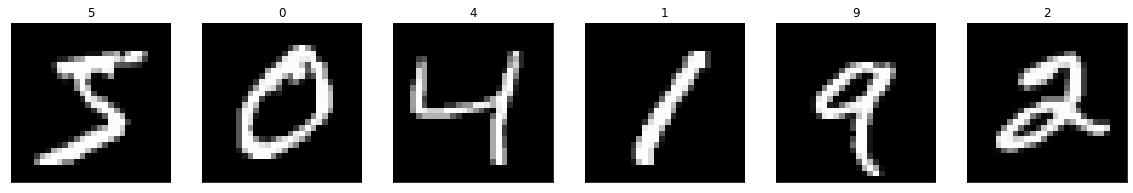

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

# plot first six training images
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

In [ ]:
##Scaling Image

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255


In [ ]:
#encoding target 

from keras.utils import np_utils

num_classes = 10 

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)




In [ ]:
img_rows, img_cols = 28,28

X_train = X_train.reshape(X_train.shape[0],img_rows,img_cols,1)
X_test = X_test.reshape(X_test.shape[0],img_rows,img_cols,1)

input_shape = (img_rows,img_cols,1)

print('input_shape: ', input_shape)
print('x_train shape:', X_train.shape)

input_shape:  (28, 28, 1)
x_train shape: (60000, 28, 28, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D,BatchNormalization


model = Sequential()

model.add(Conv2D(8, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))#26
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(10, (3, 3), activation='relu'))#24
model.add(BatchNormalization())
model.add(Dropout(0.2))



model.add(Conv2D(10, (3, 3), activation='relu'))#22
model.add(Conv2D(10, (3, 3),strides=(2,2), activation='relu'))#11

model.add(Conv2D(14, (3, 3), activation='relu'))#8
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(14, (3, 3), activation='relu'))#6


model.add(Conv2D(14, (3, 3), activation='relu'))#4

model.add(Conv2D(10, 4,4))

model.add(Flatten())
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_21 (Batc (None, 26, 26, 8)         32        
_________________________________________________________________
dropout_21 (Dropout)         (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 24, 24, 10)        730       
_________________________________________________________________
batch_normalization_22 (Batc (None, 24, 24, 10)        40        
_________________________________________________________________
dropout_22 (Dropout)         (None, 24, 24, 10)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 22, 22, 10)       

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', 
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=8, epochs=20,
          validation_data=(X_test, y_test), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Epoch 1/20
7500/7500 - 67s - loss: 0.2366 - accuracy: 0.9264 - val_loss: 0.0842 - val_accuracy: 0.9732

Epoch 00001: val_loss improved from inf to 0.08419, saving model to model.weights.best.hdf5
Epoch 2/20
7500/7500 - 38s - loss: 0.0978 - accuracy: 0.9697 - val_loss: 0.0543 - val_accuracy: 0.9818

Epoch 00002: val_loss improved from 0.08419 to 0.05429, saving model to model.weights.best.hdf5
Epoch 3/20
7500/7500 - 38s - loss: 0.0739 - accuracy: 0.9773 - val_loss: 0.0479 - val_accuracy: 0.9835

Epoch 00003: val_loss improved from 0.05429 to 0.04789, saving model to model.weights.best.hdf5
Epoch 4/20
7500/7500 - 38s - loss: 0.0631 - accuracy: 0.9804 - val_loss: 0.0512 - val_accuracy: 0.9829

Epoch 00004: val_loss did not improve from 0.04789
Epoch 5/20
7500/7500 - 38s - loss: 0.0587 - accuracy: 0.9823 - val_loss: 0.0403 - val_accuracy: 0.9868

Epoch 00005: val_loss improved from 0.04789 to 0.04028, saving model to model.weights.best.hdf5
Epoch 6/20
7500/7500 - 38s - loss: 0.0516 - accur

In [ ]:
model2 = Sequential()

model2.add(Conv2D(8, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))#26
model2.add(BatchNormalization())
model2.add(Dropout(0.2))

model2.add(Conv2D(8, (3, 3), activation='relu'))#24
model2.add(BatchNormalization())
model2.add(Dropout(0.2))



model2.add(Conv2D(8, (3, 3), activation='relu'))#22
model2.add(BatchNormalization())
model2.add(Dropout(0.2))

model2.add(Conv2D(10, (3, 3), activation='relu'))#20
model2.add(MaxPooling2D(pool_size=(2, 2)))#10


model2.add(Conv2D(10, (1, 1), activation='relu'))#10

model2.add(Conv2D(12, (3, 3), activation='relu'))#8

model2.add(Conv2D(16, (3, 3), activation='relu'))#6

model2.add(Conv2D(16, (3, 3), activation='relu'))#4

model2.add(Conv2D(10, 4,4))

model2.add(Flatten())
model2.add(Dense(10,activation='softmax'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_3 (Batch (None, 26, 26, 8)         32        
_________________________________________________________________
dropout_3 (Dropout)          (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 8)         584       
_________________________________________________________________
batch_normalization_4 (Batch (None, 24, 24, 8)         32        
_________________________________________________________________
dropout_4 (Dropout)          (None, 24, 24, 8)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 22, 22, 8)        

In [ ]:
from keras.optimizers import Adam


model2.compile(loss='categorical_crossentropy', optimizer='SGD', 
              metrics=['accuracy'])

In [ ]:
checkpointer = ModelCheckpoint(filepath='model2.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model2.fit(X_train, y_train, batch_size=8, epochs=20,
          validation_data=(X_test, y_test), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

NameError: ignored